In [48]:
import pandas as pd
df = pd.read_csv('vgsales.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [50]:
df['Genre'].nunique()

12

In [51]:
df['Platform'].nunique()

31

In [52]:
df = df.dropna()

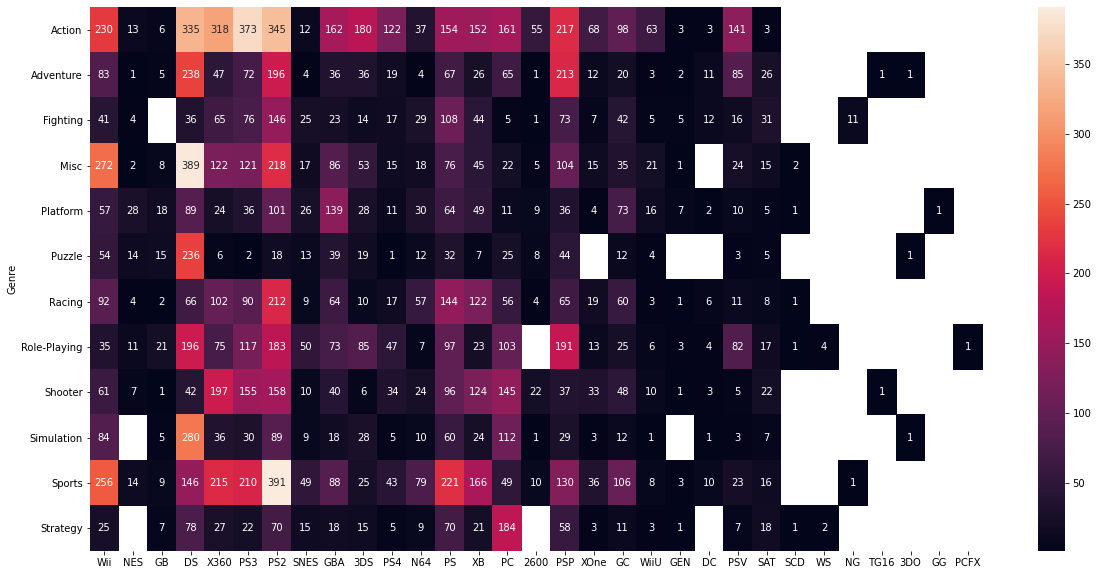

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

nb_games = pd.DataFrame(df.groupby('Genre').Global_Sales.sum())
for platform in df.Platform.unique():
    tmp = df[df.Platform == platform].groupby('Genre').Rank.count()
    nb_games[platform] = tmp
nb_games = nb_games.drop('Global_Sales', axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(nb_games, annot=True, fmt='.0f')
plt.show()

## Analyse
Nous pouvons voir ici que pour certains genres de jeux, seulement quelques consoles ont sorti des exemplaires marquants. Ainsi, à l'epoque de la Nintendo DS (entre 2004 et 2013), la plupart des jeux de puzzle ayant été des succès sont sortis sur cette console. Nous pouvons également constater cela avec les jeux de strategie, dont la plateforme privilégiée semble être le PC.

Cependant d'autres genres de jeux, tels que les jeux de sport et les jeux d'action, ont fonctionné sur la plupart des plateformes disponibles sur le marché.

Nous pouvons maintenant nous poser la question suivante : si certaines consoles ont sorti un grand nombre de jeux à succès, ces jeux ont-ils reussi à se demarquer des concurrents ?

# Check part des ventes par genre pour chaque plateforme

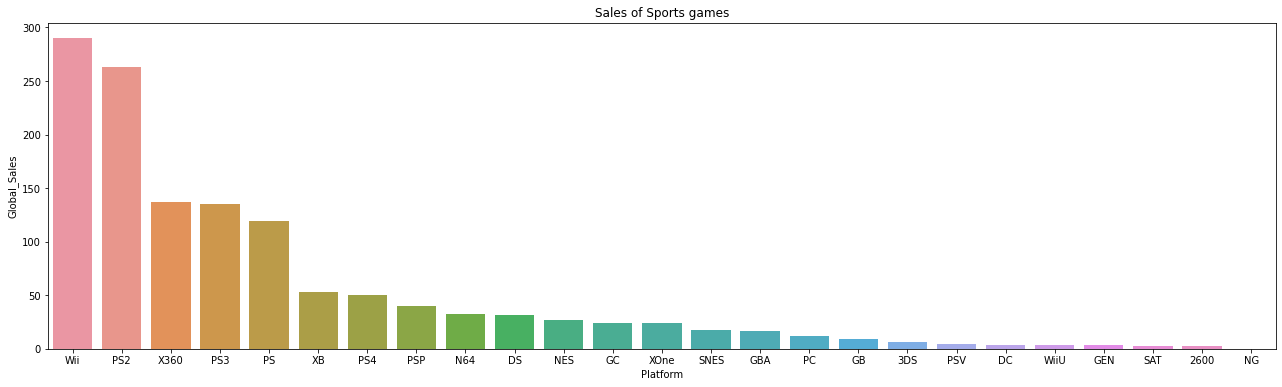

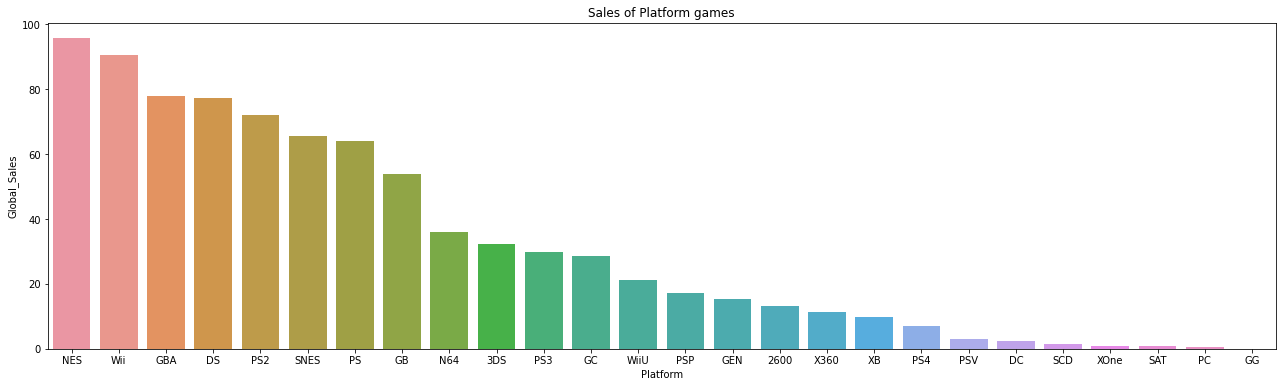

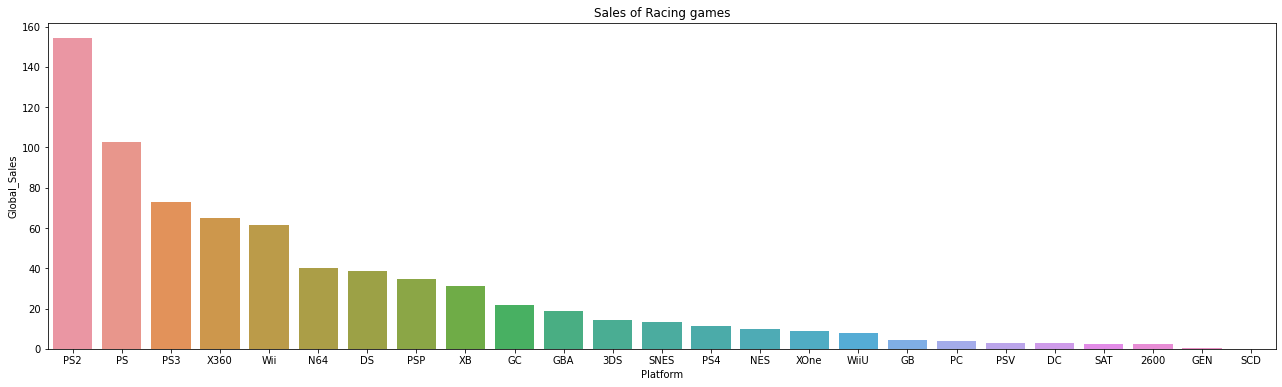

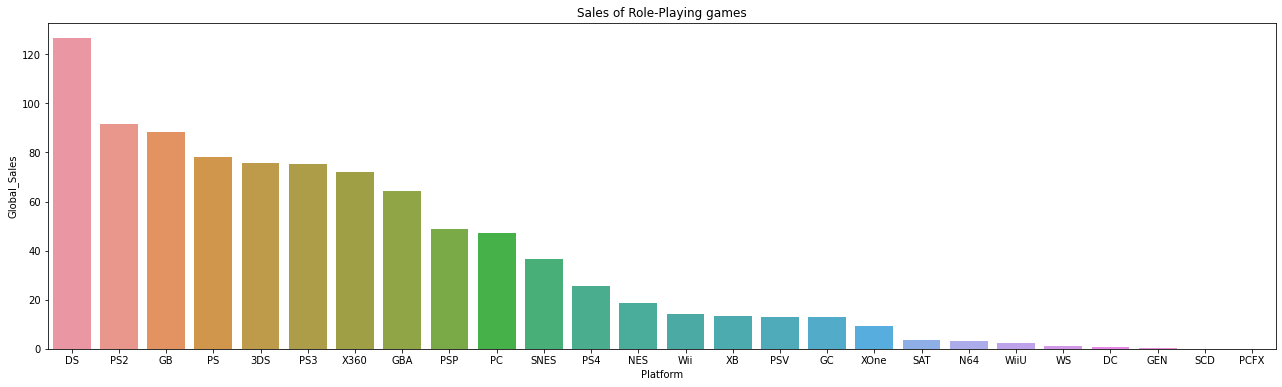

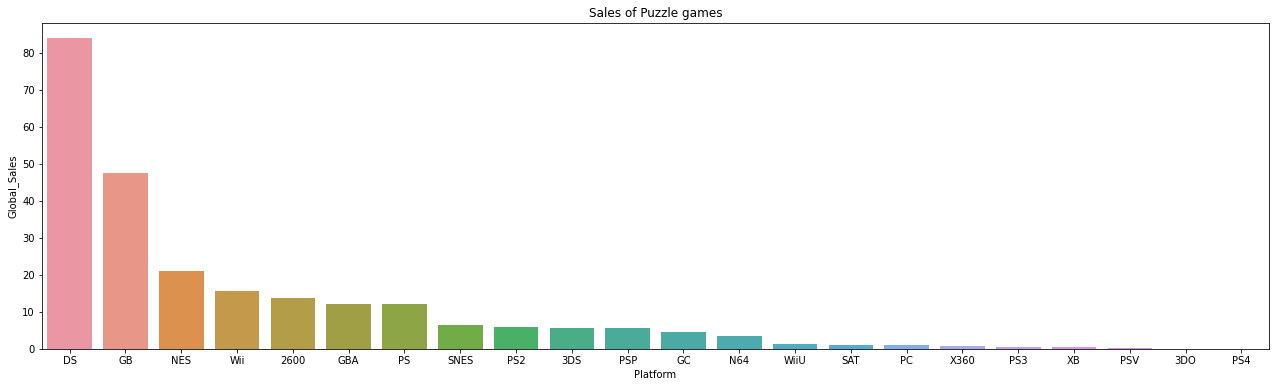

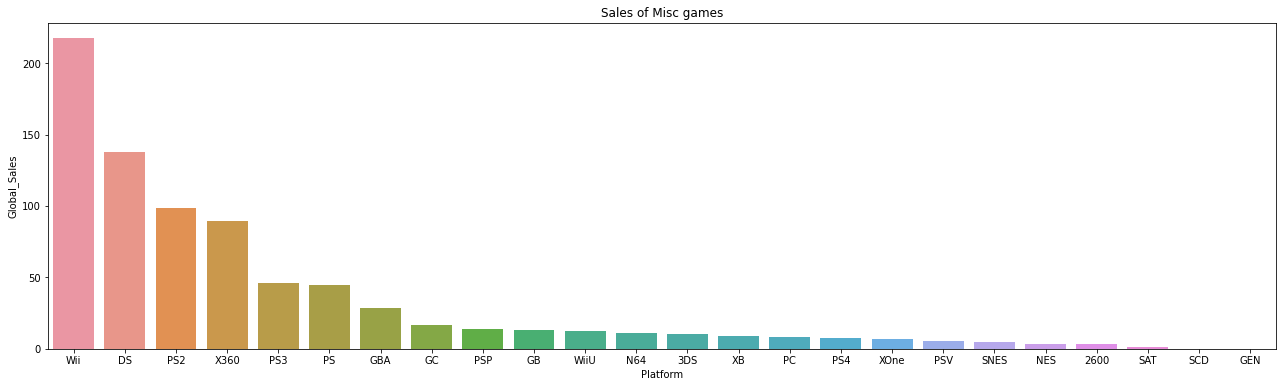

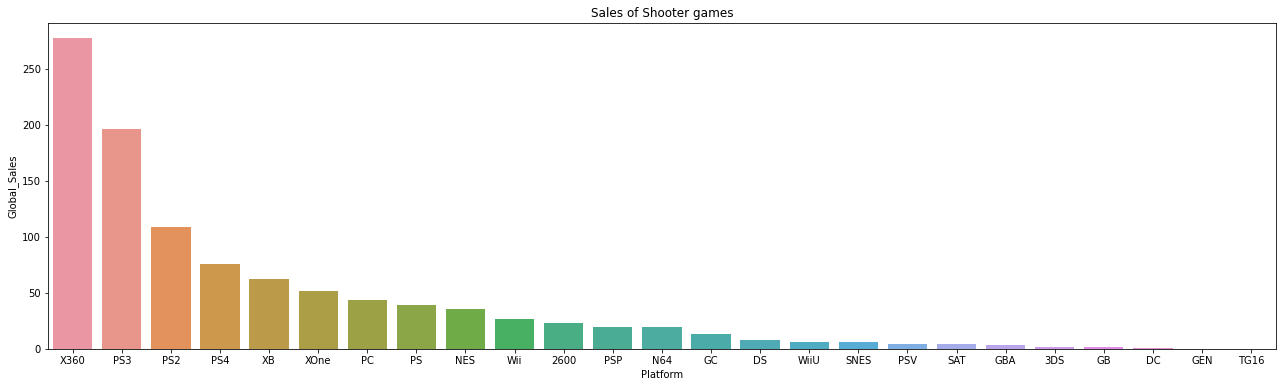

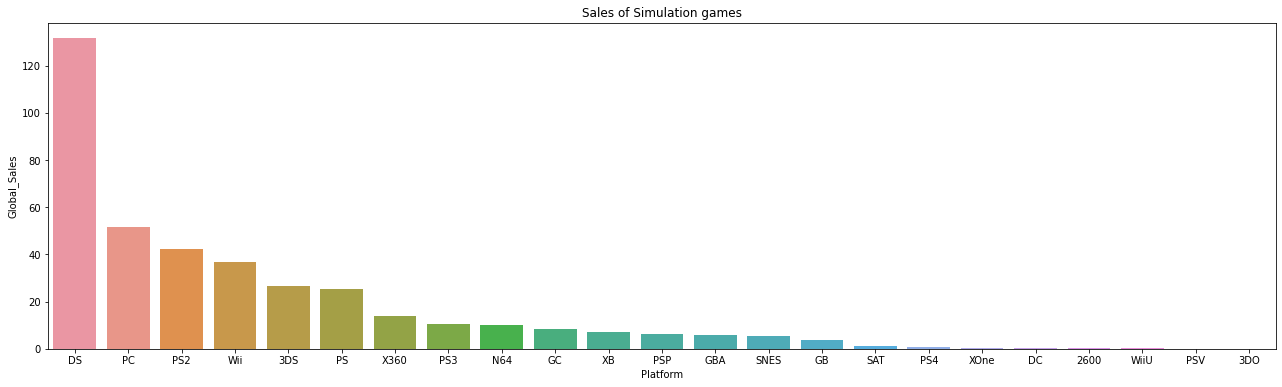

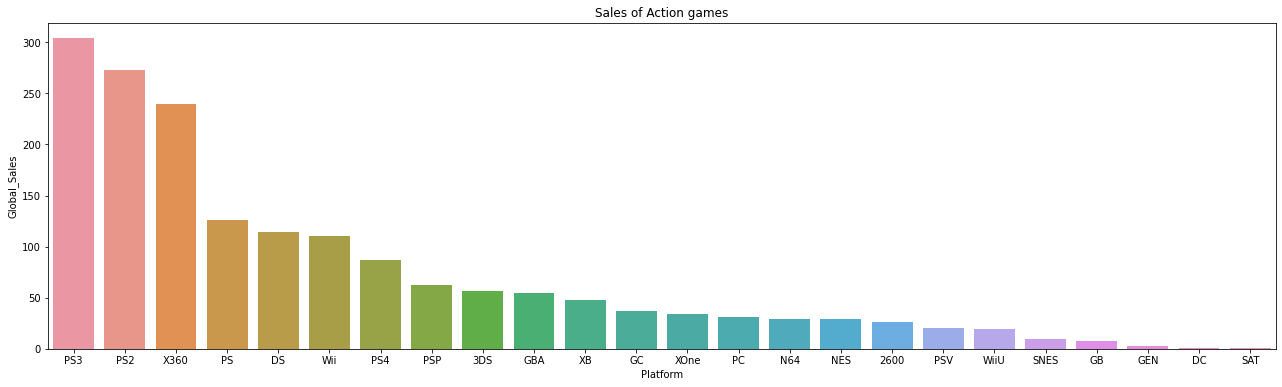

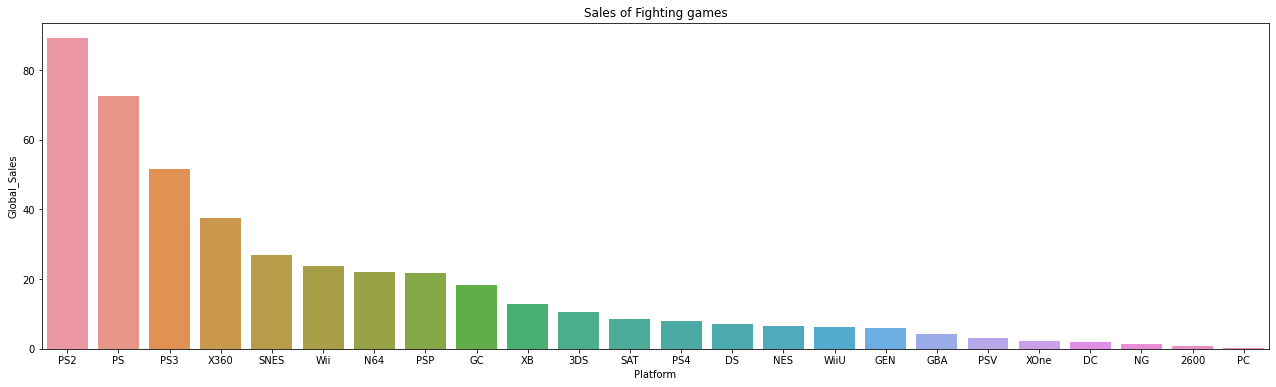

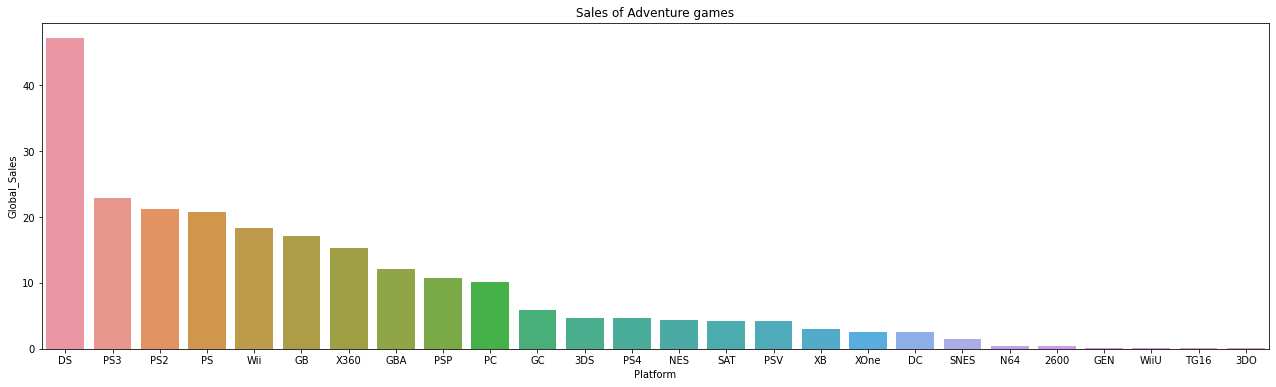

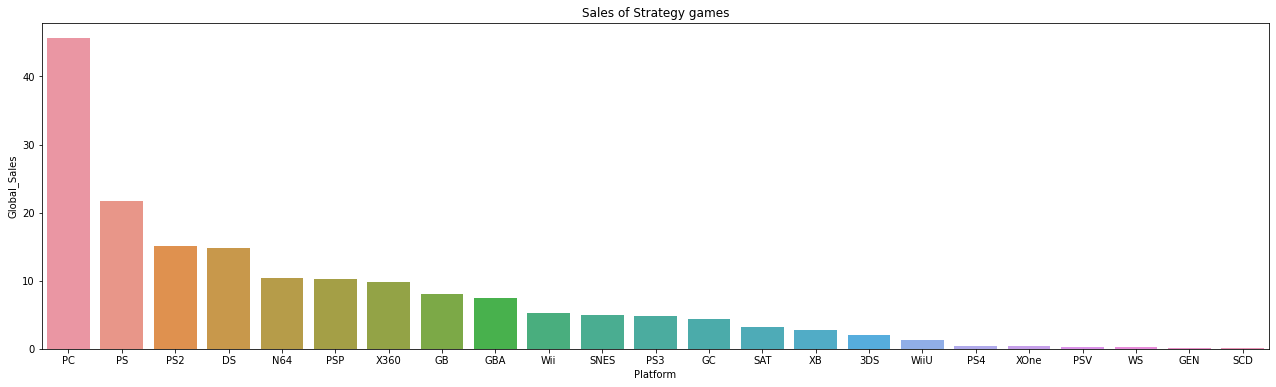

In [8]:
def sales_by_genre(df, genre):
    sales = pd.DataFrame(df[df.Genre == genre].groupby('Platform').Global_Sales.sum())
    sales = sales.sort_values(by=['Global_Sales'], ascending=False)
    plt.figure(figsize=(22, 6))
    sns.barplot(x=sales.index, y=sales.Global_Sales)
    plt.title('Sales of ' + genre + ' games')
    plt.show()

for genre in df.Genre.unique():
    sales_by_genre(df, genre)

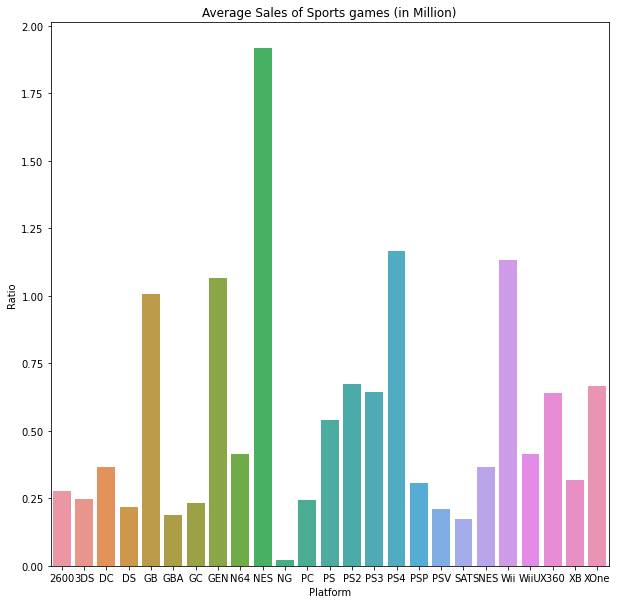

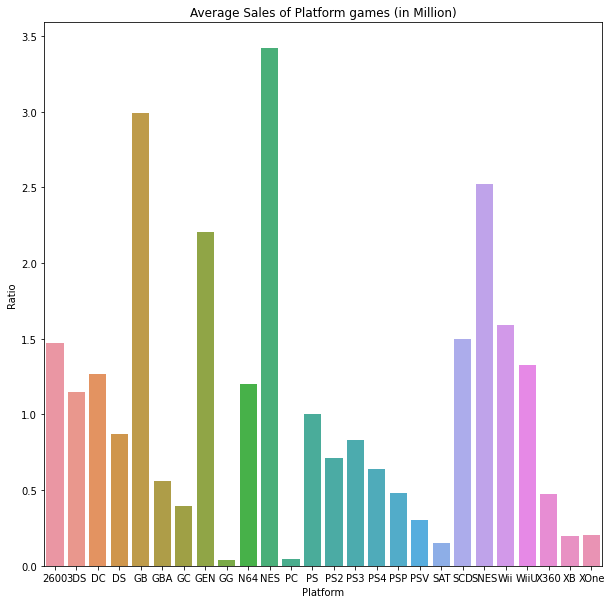

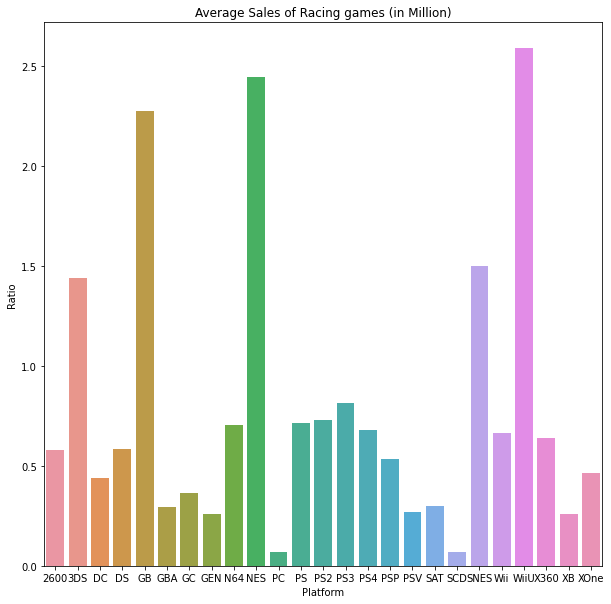

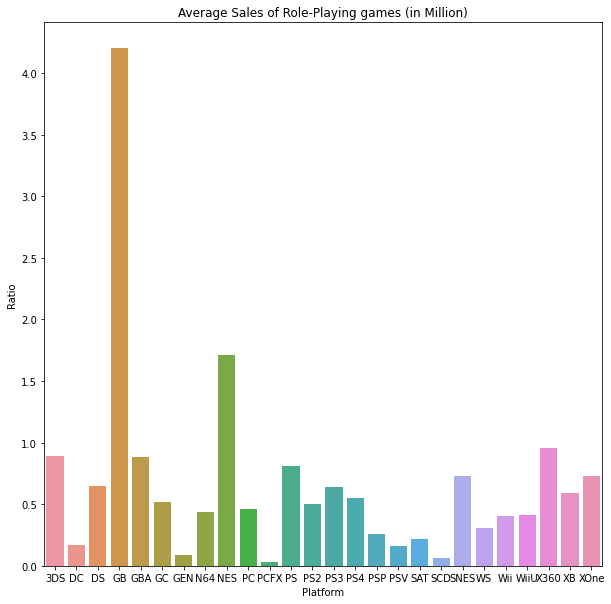

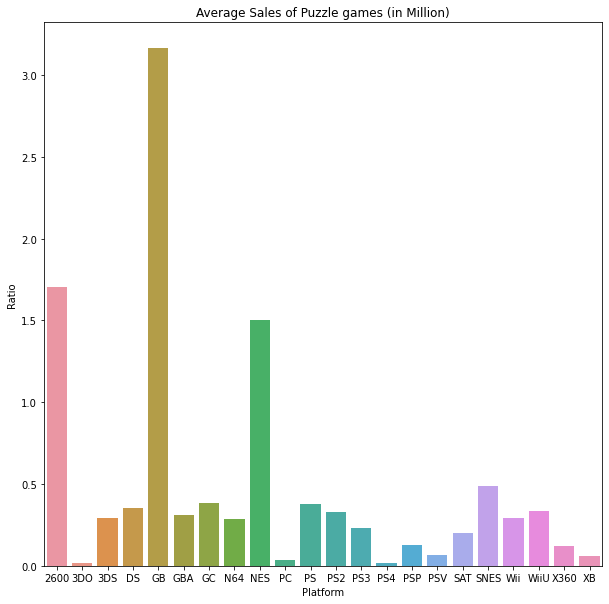

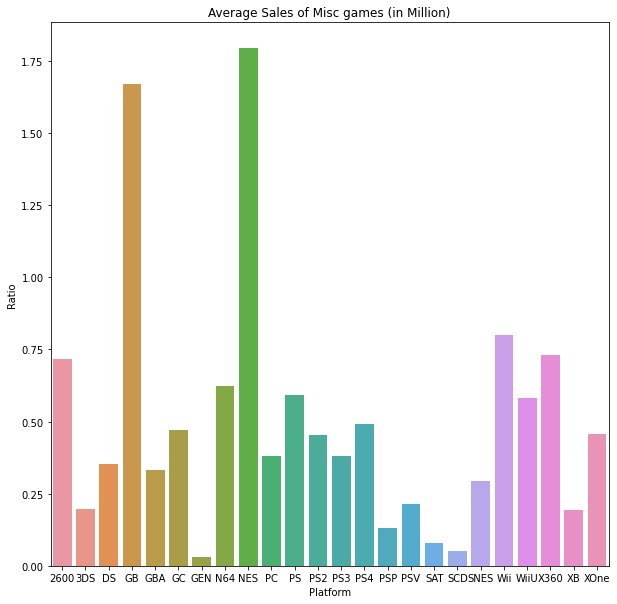

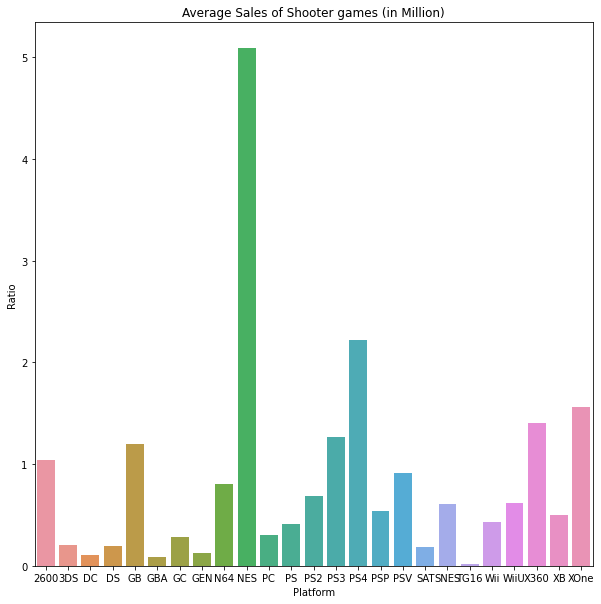

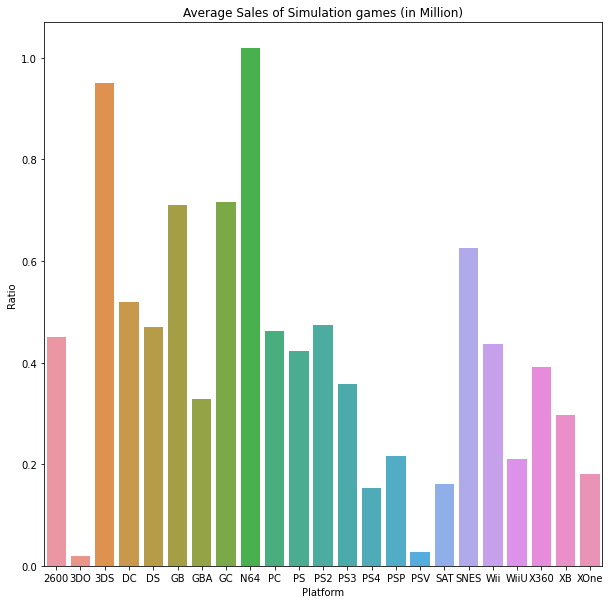

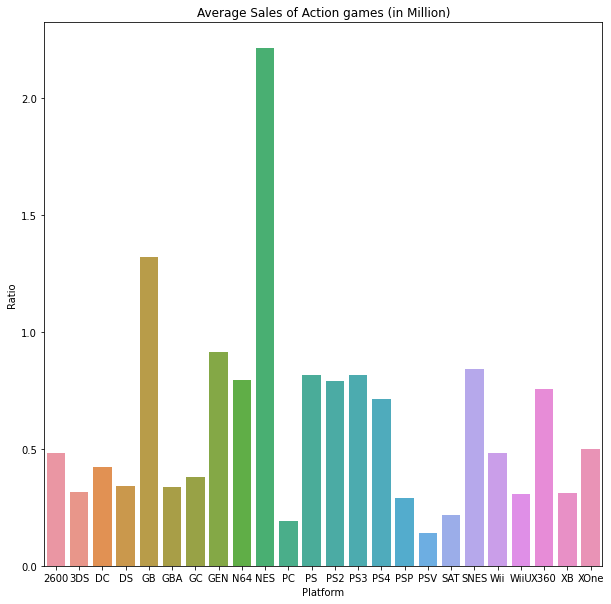

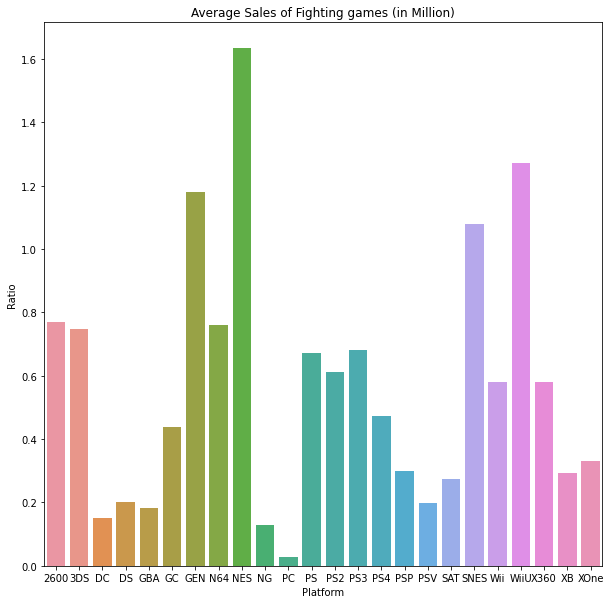

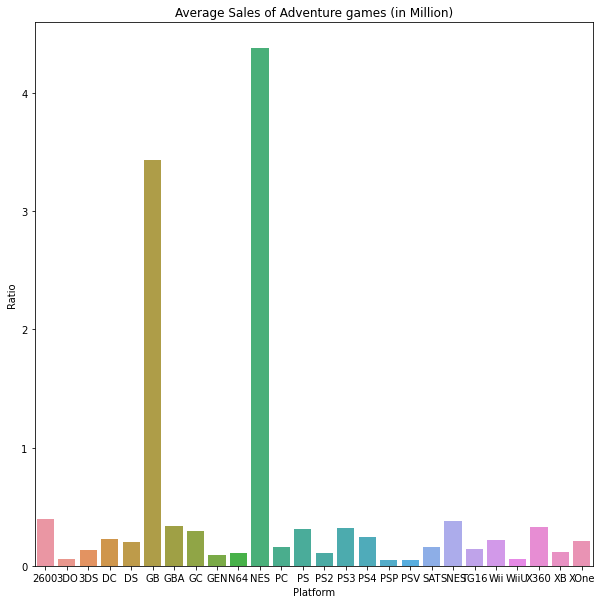

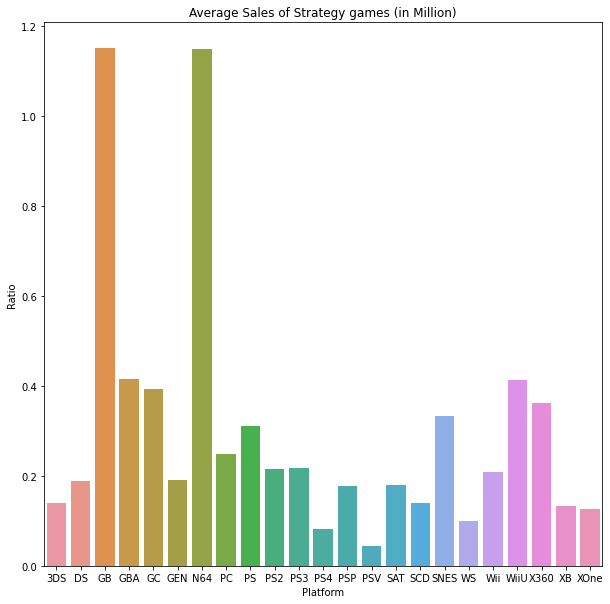

In [9]:
def plot_average(df, genre):
    platgenre = pd.DataFrame(df[df.Genre == genre].groupby('Platform').Rank.count())
    platgenre = platgenre.rename(columns={'Rank': 'Count'})
    sales = pd.DataFrame(df[df.Genre == genre].groupby('Platform').Global_Sales.sum())
    
    final = pd.concat([platgenre, sales], axis=1)
    final['Ratio'] = final.Global_Sales / final.Count
    plt.figure(figsize=(10, 10))
    sns.barplot(x=final.index, y=final.Ratio)
    plt.title("Average Sales of " + genre + " games (in Million)")
    plt.show()

for genre in df.Genre.unique():
    plot_average(df, genre)

## Analyse

En calculant le rapport ventes_totales / nombre_de_jeux_créés de chaque plateforme, nous constatons qu'il y a de réels écarts de bénéfices.

Mais attention, il faut remettre cette analyse dans son contexte. Nous parlons ici de jeux qui ont fait plus de 100 000 ventes. Ainsi, même si la GameBoy (GB) semble faire beaucoup plus de bénéfices moyens sur les jeux de Role-Play, nous ne pouvons en déduire que produire un RPG sur GameBoy sera forcément un succès, car il nous manque tous les jeux qui n'ont pas fonctionné. 

De plus, il faut prendre en compte ces données sur des périodes différentes. Si l'on devait sortir un jeu de sport sur NES en 2021, il y a peu de chances qu'il soit plus populaire que si il sortait sur PC ou PS4.
Mais ces informations ne sont pas inutiles pour autant. Car si l'on remet les consoles dans leur contexte historique, cela nous permet de constater quelles plateformes étaient en avance sur les autres pour tel ou tel genre de jeu.